In [1]:
import os
import os.path as osp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cellpose_v2.models import CellposeModel
from cellpose_v2.io import load_train_test_data
from cellpose_v2.metrics import average_precision

In [2]:
BASE_PATH = "../Data/Cellpose/Sartorius"
train_dir = osp.join(BASE_PATH, "train")
val_dir = osp.join(BASE_PATH, "val")
test_dir = osp.join(BASE_PATH, "test")

EXP_PATH = "../Experiments"
MODEL = "cellpose_v2"
DATASET = "sartorius"

model_dir = osp.join(osp.join(EXP_PATH, "{}_{}".format(MODEL, DATASET)), "models")

In [3]:
model_file_list = [f for f in os.listdir(model_dir) if f.startswith("cellpose")]
epoch_list = [f.split("_")[-1] for f in os.listdir(model_dir) if f.startswith("cellpose")]

In [4]:
gb_val_csv = pd.read_csv(osp.join(val_dir, "val.csv")).groupby("id")
gb_test_csv = pd.read_csv(osp.join(test_dir, "test.csv")).groupby("id")

output = load_train_test_data(val_dir, test_dir=test_dir, mask_filter='_mask')
val_images, val_labels, image_names_val, test_images, test_labels, image_names_test = output

val_images = [np.concatenate((val_images[i], np.zeros(val_images[i].shape)), axis=2) for i in range(len(val_images))]
test_images = [np.concatenate((test_images[i], np.zeros(test_images[i].shape)), axis=2) for i in range(len(test_images))]
val_labels = [val_labels[i][0].astype(int) for i in range(len(val_labels))]
test_labels = [test_labels[i][0].astype(int) for i in range(len(test_labels))]

val_image_ids = [f.split("/")[-1].split(".")[0] for f in image_names_val]
test_image_ids = [f.split("/")[-1].split(".")[0] for f in image_names_test]

val_cell_type_list = [gb_val_csv.get_group(image_id).reset_index().loc[0, "cell_type"] for image_id in val_image_ids]
test_cell_type_list = [gb_test_csv.get_group(image_id).reset_index().loc[0, "cell_type"] for image_id in test_image_ids]

In [22]:
model_idx = 7
print(f">>> Epoch {epoch_list[model_idx]}")
model_path = osp.join(model_dir, model_file_list[model_idx])
model = CellposeModel(gpu=True, pretrained_model=model_path,  net_avg=False, diam_mean=17., device=None, residual_on=True, style_on=True, concatenation=False, nchan=2)
print(f"Loading model {model_path}")
# val_masks, flows, styles =  model.eval(val_images, batch_size=8, diameter=17., channels=[0,0], net_avg=False)
# mean_ap = average_precision(val_labels, val_masks, threshold=[0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95])
# print(f"Val Mean AP {np.mean(mean_ap[0])}")

>>> Epoch 92
Loading model ../Experiments/cellpose_v2_sartorius/models/cellpose_residual_on_style_on_concatenation_off_cellpose_v2_sartorius_2022_07_31_23_55_40.270410_epoch_92


In [23]:
[dPs, cellprobs] =  model.eval(val_images, batch_size=8, diameter=17., channels=[0,0], net_avg=False)

In [24]:
print(dPs[0].shape)
print(cellprobs[0].shape)

(8, 1, 520, 704)
(1, 520, 704)


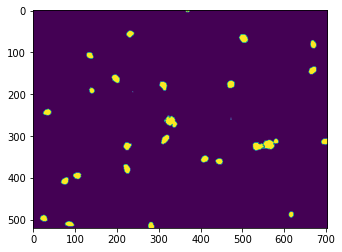

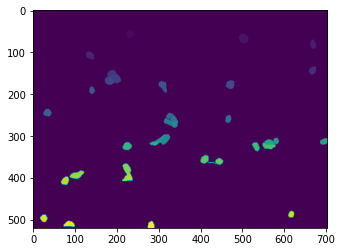

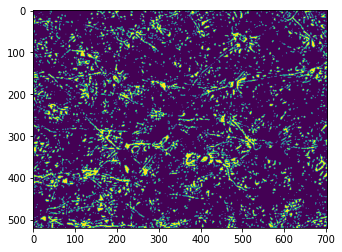

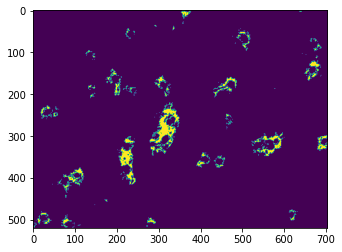

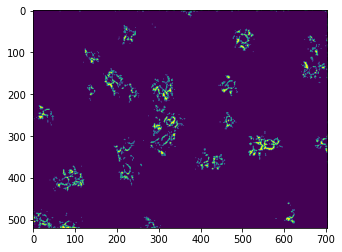

In [26]:
pred = np.argmax(dPs[0][:,0], axis=0)
plt.figure()
plt.imshow(cellprobs[0][0]>0.0)
plt.show()
plt.figure()
plt.imshow(val_labels[0])
plt.show()
plt.figure()
plt.imshow(pred == 0)
plt.show()
plt.figure()
plt.imshow(pred == 1)
plt.show()
plt.figure()
plt.imshow(pred == 2)
plt.show()

In [ ]:

niter = 200 if (do_3D and not resample) else (1 / rescale * 200)

In [8]:
# if osp.exists(osp.join(model_dir, 'val_eval.csv')):
#     os.remove(osp.join(model_dir, 'val_eval.csv'))
# with open(osp.join(model_dir, 'val_eval.csv'), 'w') as f:
#     eval_head = ["epoch", "image_id", "cell_type", "ap_50", "ap_55", "ap_60", "ap_65", "ap_70", "ap_75", "ap_80", "ap_85", "ap_90", "ap_95", "ap"]
#     f.write(','.join(eval_head) + '\n')
# if osp.exists(osp.join(model_dir, 'test_eval.csv')):
#     os.remove(osp.join(model_dir, 'test_eval.csv'))
# with open(osp.join(model_dir, 'test_eval.csv'), 'w') as f:
#     eval_head = ["epoch", "image_id", "cell_type", "ap_50", "ap_55", "ap_60", "ap_65", "ap_70", "ap_75", "ap_80", "ap_85", "ap_90", "ap_95", "ap"]
#     f.write(','.join(eval_head) + '\n')
    
# for model_idx in range(len(model_file_list)):
#     print(f">>> Epoch {epoch_list[model_idx]}")
#     model_path = osp.join(model_dir, model_file_list[model_idx])
#     model = CellposeModel(gpu=True, pretrained_model=model_path,  net_avg=False,
#                               diam_mean=17., device=None, residual_on=True, style_on=True, concatenation=False, nchan=2)
#     print(f"Loading model {model_path}")
#     val_masks, flows, styles =  model.eval(val_images, batch_size=8, diameter=17., channels=[0,0], net_avg=False)
#     mean_ap = average_precision(val_labels, val_masks, threshold=[0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95])
#     print(f"Val Mean AP {np.mean(mean_ap[0])}")
#     for image_idx in range(len(val_image_ids)):
#         cell_type = gb_val_csv.get_group(val_image_ids[image_idx]).reset_index().loc[0, "cell_type"]
#         with open(osp.join(model_dir, 'val_eval.csv'), 'a') as f:
#             log = [epoch_list[model_idx], val_image_ids[image_idx], cell_type] + list(mean_ap[0][image_idx]) + [np.mean(mean_ap[0][image_idx])]
#             log = map(str, log)
#             f.write(','.join(log) + '\n')
        
#     test_masks, flows, styles =  model.eval(test_images, batch_size=8, diameter=17., channels=[0,0], net_avg=False)
#     mean_ap = average_precision(test_labels, test_masks, threshold=[0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95])
#     print(f"Test Mean AP {np.mean(mean_ap[0])}")
#     for image_idx in range(len(test_image_ids)):
#         cell_type = gb_test_csv.get_group(test_image_ids[image_idx]).reset_index().loc[0, "cell_type"]
#         with open(osp.join(model_dir, 'test_eval.csv'), 'a') as f:
#             log = [epoch_list[model_idx], test_image_ids[image_idx], cell_type] + list(mean_ap[0][image_idx]) + [np.mean(mean_ap[0][image_idx])]
#             log = map(str, log)
#             f.write(','.join(log) + '\n')    